# Домашнее задание №3

Задание выполнил(а): Бабиков Сергей (9 вариант)

Файлы «youtube_1.csv» … «youtube_10.csv» содержат следующие сведения о видеороликах на YouTube (по сто роликов на каждый вариант):

n — номер наблюдения,
id — идентификатор ролика,
framerate — число кадров в секунду,
frames — общее число кадров в видео,
bitrate — битрейт, Кбит/сек.
duration — продолжительность, сек.
size — размер видеофайла, байт.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline

Возьмем данные и построим две корреляционные таблицы (Спирмена https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient и Пирсона https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

In [2]:
data = pd.read_csv('data/youtube_9.csv')

In [3]:
data.drop(columns = ['id', 'n'], inplace=True)

In [4]:
data.corr(method = 'pearson')

,framerate,frames,bitrate,duration,size
framerate,1.000000,0.245084,0.410831,0.097332,0.273054
frames,0.245084,1.000000,0.048906,0.961267,0.523980
bitrate,0.410831,0.048906,1.000000,-0.016874,0.577006
duration,0.097332,0.961267,-0.016874,1.000000,0.469610
size,0.273054,0.523980,0.577006,0.469610,1.000000


In [5]:
data.corr(method = 'spearman')

,framerate,frames,bitrate,duration,size
framerate,1.000000,0.310633,0.500923,-0.030248,0.423211
frames,0.310633,1.000000,0.184041,0.903545,0.714380
bitrate,0.500923,0.184041,1.000000,-0.041452,0.759820
duration,-0.030248,0.903545,-0.041452,1.000000,0.552559
size,0.423211,0.714380,0.759820,0.552559,1.000000


In [6]:
data.corr(method = 'pearson').to_csv('corrPearson.csv')
data.corr(method = 'spearman').to_csv('corrSpearman.csv')

Далее оценим значимость каждого коэффициента:
    * — коэффициент значим на уровне 5%,
    ** — коэффициент значим на уровне 1%,
    *** — коэффициент значим на уровне 0.1%.


$$t = \frac{r * \sqrt{(n-2)}}{\sqrt{(1 - r^2)}}$$

In [7]:
corrPearson = pd.read_csv('corrPearson.csv')
corrSpearman = pd.read_csv('corrSpearman.csv')

In [8]:
corrArray = np.empty([data.shape[1], data.shape[1]], dtype = 'object')
i, j = 0, 0
for name in data.columns:
    for name2 in data.columns:
        corrArray[i][j] = str(np.round(data.corr(method = 'pearson')[name][name2], decimals=3))
        if(name != name2):
            t = np.abs(float(corrArray[i][j]) * np.sqrt(data.shape[0] - 2) / np.sqrt(1 - float(corrArray[i][j])**2))
            t5 = stats.t.ppf(0.975, data.shape[0] - 2)
            t1 = stats.t.ppf(0.995, data.shape[0] - 2)
            t01 = stats.t.ppf(0.9995, data.shape[0] - 2)
            if(t > t01):
                    corrArray[i][j] = '***' + corrArray[i][j] 
            elif(t > t1):
                 corrArray[i][j] = '**' + corrArray[i][j]
            elif(t > t5):
                 corrArray[i][j] = '*' + corrArray[i][j]
        j += 1
    i += 1
    j = 0
corrPearson = pd.DataFrame(data = corrArray, index = data.columns, columns = data.columns)
corrPearson.head()

,framerate,frames,bitrate,duration,size
framerate,1.0,*0.245,***0.411,0.097,**0.273
frames,*0.245,1.0,0.049,***0.961,***0.524
bitrate,***0.411,0.049,1.0,-0.017,***0.577
duration,0.097,***0.961,-0.017,1.0,***0.47
size,**0.273,***0.524,***0.577,***0.47,1.0


In [9]:
corrArray = np.empty([data.shape[1], data.shape[1]], dtype = 'object')
i, j = 0, 0
for name in data.columns:
    for name2 in data.columns:
        corrArray[i][j] = str(np.round(data.corr(method = 'spearman')[name][name2], decimals = 3))
        if(name != name2):
            t = np.abs(float(corrArray[i][j]) * np.sqrt(data.shape[0] - 2) / np.sqrt(1 - float(corrArray[i][j])**2))
            t5 = stats.t.ppf(0.975, data.shape[0] - 2)
            t1 = stats.t.ppf(0.995, data.shape[0] - 2)
            t01 = stats.t.ppf(0.9995, data.shape[0] - 2)
            if(t > t01):
                corrArray[i][j] = '***' + corrArray[i][j] 
            elif(t > t1):
                 corrArray[i][j] = '**' + corrArray[i][j]
            elif(t > t5):
                 corrArray[i][j] = '*' + corrArray[i][j]
        j += 1
    i += 1
    j = 0
corrSpearman = pd.DataFrame(data = corrArray, index = data.columns, columns = data.columns)
corrSpearman.head()

,framerate,frames,bitrate,duration,size
framerate,1.0,**0.311,***0.501,-0.03,***0.423
frames,**0.311,1.0,0.184,***0.904,***0.714
bitrate,***0.501,0.184,1.0,-0.041,***0.76
duration,-0.03,***0.904,-0.041,1.0,***0.553
size,***0.423,***0.714,***0.76,***0.553,1.0


Самая большая разница коэффициентов у признаков SIZE и FRAMES. Построим диграмму рассеивания

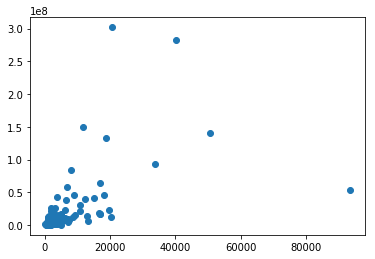

In [10]:
x = data['frames']
y = data['size']

plt.scatter(x, y)
plt.show()